# Import datasets

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Clean and restructure data

In [9]:
df_impExp = pd.read_csv('../energy_import_export.csv')

# Remove all exports to only get consumption data
df_impExp = df_impExp[df_impExp['Retning'] != 'EXPORT']
# Remove unecessary columns
df_impExp = df_impExp.drop(['Energikilde', 'Retning'], axis=1)
# Reformat date and set as index
df_impExp['Tidspunkt'] = pd.to_datetime(df_impExp['Tidspunkt'])
df_impExp.set_index('Tidspunkt', inplace=True)

# Split into different dfs for each building
df_solar = df_impExp[df_impExp['Måler-Id'] == 707057500042745649]
df_2 = df_impExp[df_impExp['Måler-Id'] == 707057500038344962]
df_3 = df_impExp[df_impExp['Måler-Id'] == 707057500085390523]
df_4 = df_impExp[df_impExp['Måler-Id'] == 707057500042201572]

# Group each df by month
m_means_solar = df_solar['Verdi'].resample('ME').mean()
m_means_2 = df_2['Verdi'].resample('ME').mean()
m_means_3 = df_3['Verdi'].resample('ME').mean()
m_means_4 = df_4['Verdi'].resample('ME').mean()

#print(m_means_solar)
#print(m_means_2)
#print(m_means_3)
#print(m_means_4)

Total Consumption for Each Building (KW):
Building 10724 (solar): 325692.39 KW
Building 4746: 345302.86 KW
Building 4462: 292527.46 KW
Building 10703: 446010.64 KW


Plot figure

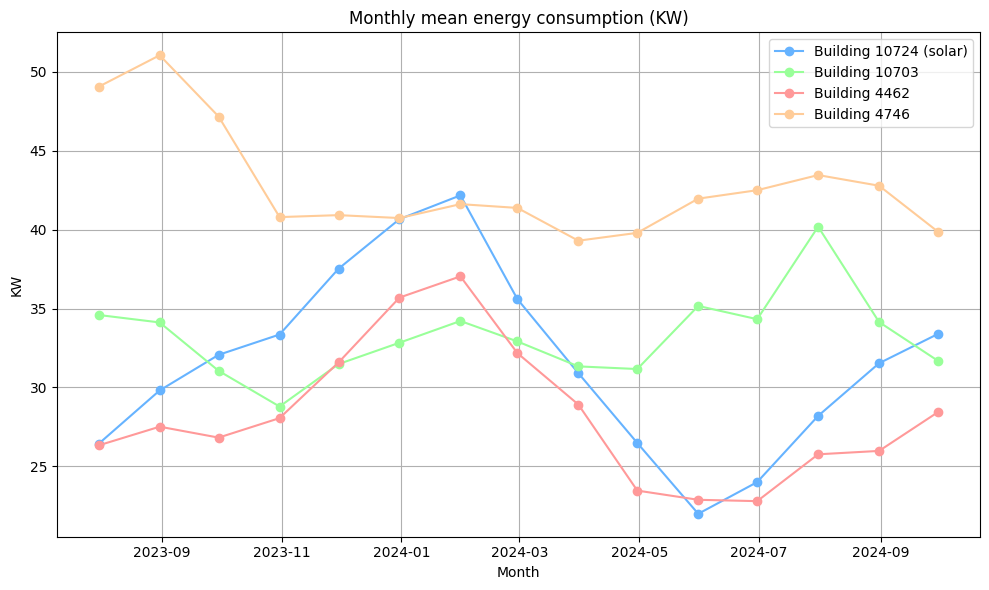

In [10]:
# Plot the montly KW means
plt.figure(figsize=(10, 6))  # Set figure size
plt.title('Monthly mean energy consumption (KW)')
plt.ylabel('KW')
plt.xlabel('Month')
plt.plot(m_means_solar.index, m_means_solar.values, marker='o', color='#66b3ff', label='Building 10724 (solar)')
plt.plot(m_means_2.index, m_means_2.values, marker='o', color='#99ff99', label='Building 10703')
plt.plot(m_means_3.index, m_means_3.values, marker='o', color='#ff9999', label='Building 4462')
plt.plot(m_means_4.index, m_means_4.values, marker='o', color='#ffcc99', label='Building 4746')

# Add grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()


Total Consumption for Each Building (KW):
Building 10724 (solar): 325692.39 KW
Building 4746: 345302.86 KW
Building 4462: 292527.46 KW
Building 10703: 446010.64 KW


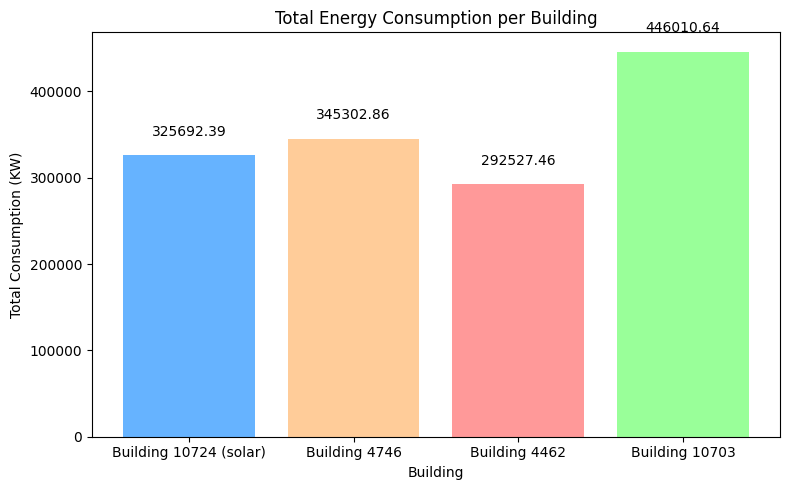

In [6]:
total_consumption = {
    'Building 10724 (solar)': df_solar['Verdi'].sum(),
    'Building 4746': df_2['Verdi'].sum(),
    'Building 4462': df_3['Verdi'].sum(),
    'Building 10703': df_4['Verdi'].sum()
}

# Print the total consumption for each building
print("Total Consumption for Each Building (KW):")
for building, consumption in total_consumption.items():
    print(f"{building}: {consumption:.2f} KW")

# Convert to DataFrame for easier plotting
total_df = pd.DataFrame(list(total_consumption.items()), columns=['Building', 'Total Consumption (KW)'])

# Plot as a column chart
plt.figure(figsize=(8, 5))  # Set figure size
plt.title('Total Energy Consumption per Building')
plt.xlabel('Building')
plt.ylabel('Total Consumption (KW)')
plt.bar(total_df['Building'], total_df['Total Consumption (KW)'], color=['#66b3ff', '#ffcc99', '#ff9999', '#99ff99'])

# Show the values on top of each bar
for index, value in enumerate(total_df['Total Consumption (KW)']):
    plt.text(index, value + 0.05 * max(total_df['Total Consumption (KW)']), f'{value:.2f}', ha='center')

# Show the plot
plt.tight_layout()
plt.show()